In [1]:
import numpy as np
import pandas as pd

import dask.dataframe as dd
import dask.array as da
import dask.bag as db

data = np.arange(100_000).reshape(200, 500)
a = da.from_array(data, chunks=(100, 100))
a

dask.array<array, shape=(200, 500), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>

In [2]:
a.chunks

((100, 100), (100, 100, 100, 100, 100))

In [3]:
a.blocks[1, 3]

dask.array<blocks, shape=(100, 100), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>

In [5]:
np.arange(100000).reshape(200, 500)

array([[    0,     1,     2, ...,   497,   498,   499],
       [  500,   501,   502, ...,   997,   998,   999],
       [ 1000,  1001,  1002, ...,  1497,  1498,  1499],
       ...,
       [98500, 98501, 98502, ..., 98997, 98998, 98999],
       [99000, 99001, 99002, ..., 99497, 99498, 99499],
       [99500, 99501, 99502, ..., 99997, 99998, 99999]])

In [6]:
a[:50, 200].compute()

array([  200,   700,  1200,  1700,  2200,  2700,  3200,  3700,  4200,
        4700,  5200,  5700,  6200,  6700,  7200,  7700,  8200,  8700,
        9200,  9700, 10200, 10700, 11200, 11700, 12200, 12700, 13200,
       13700, 14200, 14700, 15200, 15700, 16200, 16700, 17200, 17700,
       18200, 18700, 19200, 19700, 20200, 20700, 21200, 21700, 22200,
       22700, 23200, 23700, 24200, 24700])

In [7]:
a.mean().compute()

49999.5

In [8]:
np.sin(a).compute()

array([[ 0.        ,  0.84147098,  0.90929743, ...,  0.58781939,
         0.99834363,  0.49099533],
       [-0.46777181, -0.9964717 , -0.60902011, ..., -0.89796748,
        -0.85547315, -0.02646075],
       [ 0.82687954,  0.9199906 ,  0.16726654, ...,  0.99951642,
         0.51387502, -0.4442207 ],
       ...,
       [-0.99720859, -0.47596473,  0.48287891, ..., -0.76284376,
         0.13191447,  0.90539115],
       [ 0.84645538,  0.00929244, -0.83641393, ...,  0.37178568,
        -0.5802765 , -0.99883514],
       [-0.49906936,  0.45953849,  0.99564877, ...,  0.10563876,
         0.89383946,  0.86024828]])

In [9]:
a.T.compute()

array([[    0,   500,  1000, ..., 98500, 99000, 99500],
       [    1,   501,  1001, ..., 98501, 99001, 99501],
       [    2,   502,  1002, ..., 98502, 99002, 99502],
       ...,
       [  497,   997,  1497, ..., 98997, 99497, 99997],
       [  498,   998,  1498, ..., 98998, 99498, 99998],
       [  499,   999,  1499, ..., 98999, 99499, 99999]])

In [10]:
b = a.max(axis=1)[::-1] + 10

In [11]:
b[:10].compute()

array([100009,  99509,  99009,  98509,  98009,  97509,  97009,  96509,
        96009,  95509])

In [12]:
b.dask

HighLevelGraph with 6 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7fb5f3fce840>
 0. array-03d561e2794efd88b0f1550bb0e5416f
 1. chunk_max-3e80312a57fd96d5c26aa7abeeef65f9
 2. chunk_max-partial-58d98aec6ad7abfccfe47ca34eeca6e8
 3. max-aggregate-024c3845e924d84bae7db77d8a5881dd
 4. getitem-b5de765fa74bdd7d4b0a1a9cf324ee2d
 5. add-25922348f7798db2809c1a841d9cfe6e

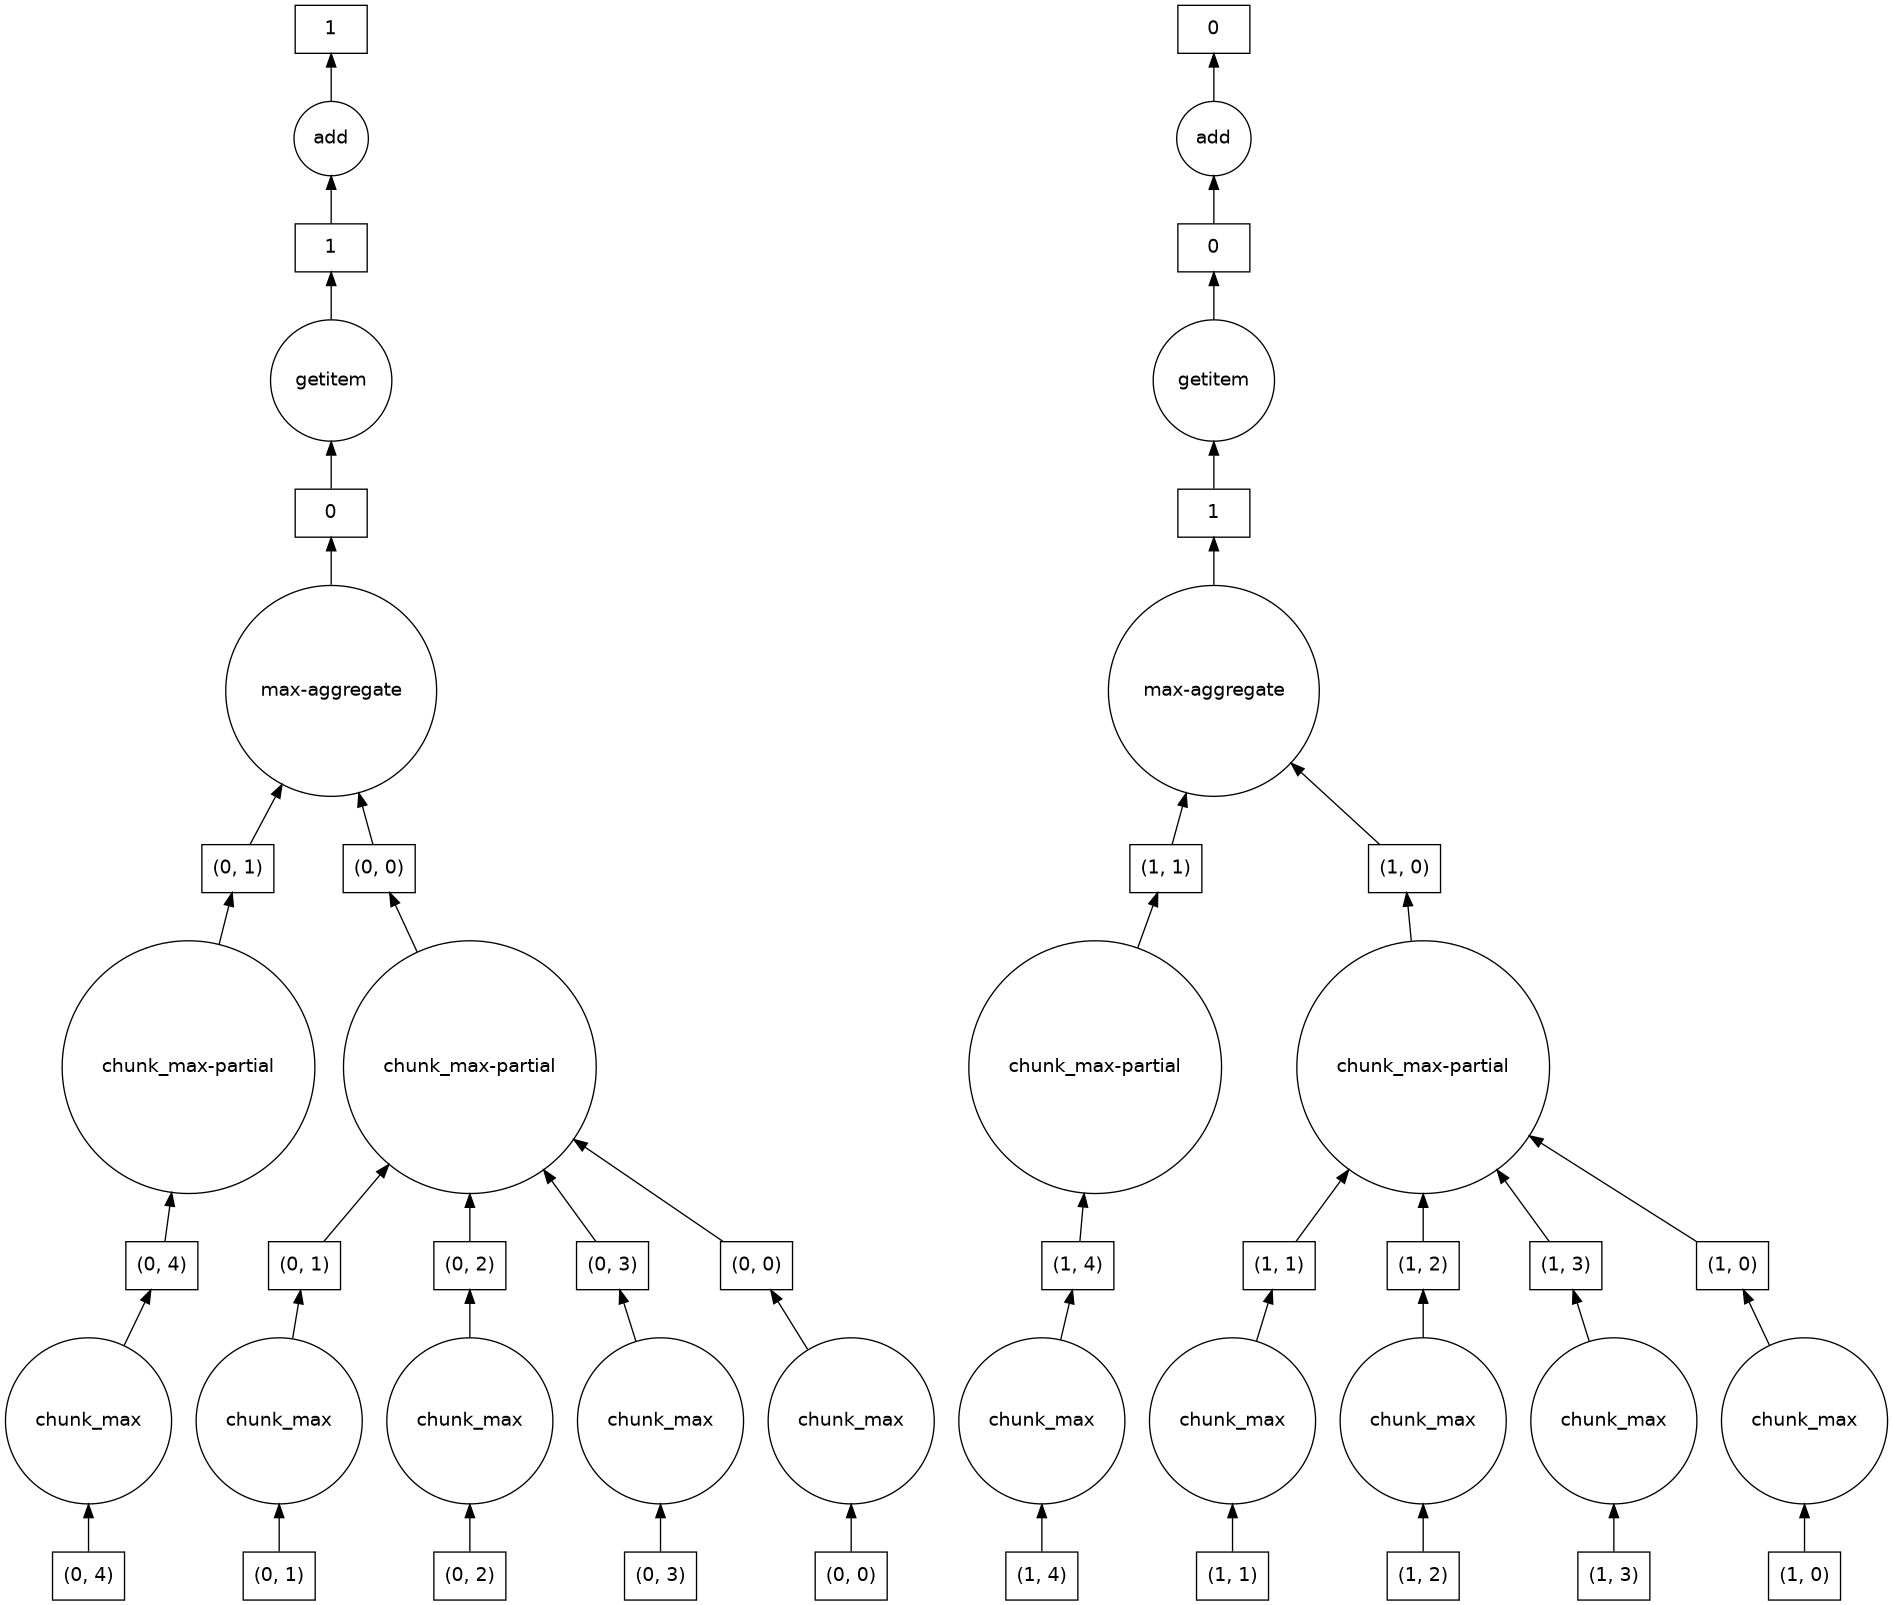

In [13]:
b.visualize()